In [10]:
from urllib import request
import nltk
import os
import re
#import os.path
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class Book(object):
    all_books = []
    def __init__(self, title, url, start=0, end=-1):
        # start is the location of where the book actually begins in the text file (skips headers, publisher info, etc.)
        # Let's create an end text so we can just grab a small amount for testing
        self.title = title
        self.url = url
        self.start = start
        self.end = end
        self.raw_ = None
        self.tokens_ = None
        # self.words = None
        # self.words2tokens = None
        self.pos_ = None

    def __str__(self):
        return self.title

    @property
    def raw(self):
        if self.raw_ is None:
            #First check if the file is stored locally
            fname = 'corpora/canon_texts/' + self.title
            if os.path.isfile(fname):
                print("File already exists")
                print("Extracting text from file")
                with open(fname, 'r') as f:
                    raw = f.read()
            else:
                print("{title} does not already exist. Grabbing from project Gutenberg".format(title=self.title))
                response = request.urlopen(self.url)
                raw = response.read().decode('utf-8-sig')
                print("Now let's save it")
                with open(fname, 'w') as outfile:
                    outfile.write(raw)
        self.raw_ = raw[self.start:self.end]
        return self.raw_
    
    @property
    def tokens(self):
        if self.tokens_ is None:
            self.tokens_ = nltk.word_tokenize(self.raw)
        return self.tokens_


    @property
    def pos(self):
        if self.pos_ == None:
            
            def mytagger(tokens):
                '''This function inputs tokens'''
                tags = nltk.pos_tag(tokens)
                return tags

            tagged = mytagger(self.tokens)

            # Note that IN can be either a preposition or a conjunction, for now we're going to list it with the prepositions
            common_noun_pos = ['NN', 'NNS']
            common_nouns = []
            verb_pos = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
            verbs=[]
            adjective_pos = ['JJ', 'JJR', 'JJS']
            adjectives = []
            pronoun_pos = ['PRP', 'PRP$', 'WP', 'WP$']
            pronouns = []
            adverb_pos = ['RB', 'RBR', 'RBS', 'WRB']
            adverbs = []
            proper_noun_pos = ['NNP', 'NNPS']
            proper_nouns = []
            conjunction_pos = ['CC']
            conjunctions = []
            preposition_pos = ['IN', 'TO']
            prepositions = []
            interjection_pos = ['UH']
            interjections = []
            modal_pos = ['MD'] # But these are also verbs, so let's make sure they show up as such
            modals = []
            tagged_other_pos = ['CD', 'DT', 'EX', 'FW', 'LS', 'PDT', 'POS', 'RP', 'SYM', 'WDT']
            tagged_others = []
            other = []

            for idx, token in enumerate(tagged):
                if token[1] in common_noun_pos:
                    common_nouns.append(token)
                elif token[1] in verb_pos:
                    verbs.append(token)
                elif token[1] in adjective_pos:
                    adjectives.append(token)
                elif token[1] in pronoun_pos:
                    pronouns.append(token)
                elif token[1] in adverb_pos:
                    adverbs.append(token)
                elif token[1] in proper_noun_pos:
                    proper_nouns.append(token)
                elif token[1] in conjunction_pos:
                    conjunctions.append(token)
                elif token[1] in preposition_pos:
                    prepositions.append(token)
                elif token[1] in interjection_pos:
                    interjections.append(token)
                elif token[1] in modal_pos:
                    modals.append(token)
                elif token[1] in tagged_other_pos:
                    tagged_others.append(token)
                else:
                    other.append(token)


            self.pos_ = [common_nouns, verbs, adjectives, pronouns, adverbs, proper_nouns, conjunctions, prepositions, interjections, modals]
        return self.pos_
        # Append modals to verbs
        # Create nouns that is both proper nouns and common nouns

In [18]:
# Let's grab our list of all the light verbs
file = 'corpora/light_verbs.txt'
with open(file, 'r') as f:
    light_verbs = f.read().splitlines()
print(light_verbs)

['be', 'am', "'m", 'is', 'are', "'re", 'wa', 'were', 'been', 'have', 'ha', 'had', "'ve", 'do', 'doe', 'did', 'done', 'go', 'goe', 'went', 'gone', 'give', 'gave', 'given', 'put', 'take', 'took', 'taken', 'feel', 'felt', 'begin', 'began', 'begun', 'get', 'got', 'make', 'put', '']


In [19]:
# But you should be comparing stems, so find the stems for all these first
# Before we do any stemming, let's make a list of all the irregular word stems
with open(os.path.join(os.path.dirname(os.getcwd()), 'Writing Buddy/corpora/irregular-stems')) as f:
    dict_irregular_stems_lines = f.read().splitlines()
    dict_irregular_stems_draft = [line.split(',') for line in dict_irregular_stems_lines]
    dict_irregular_stems = {}
    for stem_old, stem_new in dict_irregular_stems_draft:
        dict_irregular_stems[stem_old] = stem_new

In [20]:
# Now let's create a stemmer
stemmer = nltk.PorterStemmer()
def stem_better(word):
    stem = stemmer.stem(word.lower())
    if stem in dict_irregular_stems:
        stem = dict_irregular_stems[stem]
    return stem

In [21]:
books = [Book('Frankenstein', 'http://www.gutenberg.org/cache/epub/84/pg84.txt', 500),
        Book('Great Expectations', 'http://www.gutenberg.org/files/1400/1400-0.txt', 885),
        Book('A Tale of Two Cities', 'https://www.gutenberg.org/files/98/98-0.txt', 2400),
        Book('Pride and Prejudice', 'https://www.gutenberg.org/files/1342/1342-0.txt', 1200),
        Book("Alice's Adventures in Wonderland", 'https://www.gutenberg.org/files/11/11-0.txt', 1200),
        Book('Oliver Twist', 'http://www.gutenberg.org/cache/epub/730/pg730.txt', 500)]

In [22]:
# Now let's get the parts of speech
all_pos = []
for book in books:
    all_pos.append(book.pos)

File already exists
Extracting text from file
File already exists
Extracting text from file
File already exists
Extracting text from file
File already exists
Extracting text from file
File already exists
Extracting text from file
File already exists
Extracting text from file


In [23]:
# Now let's stem the verbs we've got
verb_stems = []
for idx, pos in enumerate(books[0].pos[1]):
    verb_stems.append(stem_better(pos[0]))

In [25]:
perc_light = []
for book in books:
    verb_stems = []
    for idx, pos in enumerate(book.pos[1]):
        verb_stems.append(stem_better(pos[0]))
        num_light_verbs = 0
    for idx, stem in enumerate(verb_stems):
        if stem in light_verbs:
            num_light_verbs+=1
    current_perc_light = num_light_verbs/len(verb_stems)
    perc_light.append(current_perc_light)
    print("In {title}, {perc:.2%}% of the {num_verbs} verbs are weak.".format(title=book.title, perc=current_perc_light, num_verbs=len(verb_stems)))

In Frankenstein, 32.49%% of the 14170 verbs are weak.
In Great Expectations, 38.82%% of the 36901 verbs are weak.
In A Tale of Two Cities, 37.38%% of the 25171 verbs are weak.
In Pride and Prejudice, 42.33%% of the 24419 verbs are weak.
In Alice's Adventures in Wonderland, 31.08%% of the 6104 verbs are weak.
In Oliver Twist, 33.30%% of the 30576 verbs are weak.


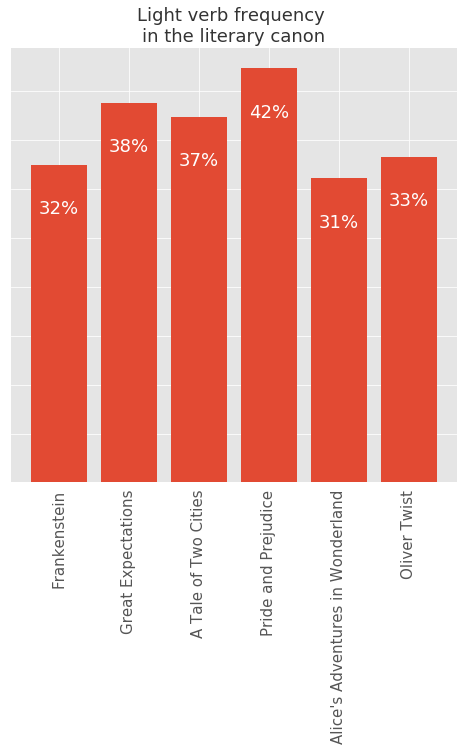

In [54]:
plt.figure(figsize=(8,8))

titles = [b.title for b in books]
pos = np.arange(len(titles))
graph_verbs = [100 * percent_light for percent_light in perc_light]

# create the bars
bars = plt.bar(pos, graph_verbs, align='center', linewidth=0)

# soften all labels by turning grey
plt.xticks(pos, titles, rotation = 'vertical', fontsize=15)
# remove the Y label since bars are directly labeled
#plt.ylabel('% Popularity', alpha=0.8)
plt.title('Light verb frequency \nin the literary canon', alpha=0.8, fontsize=18)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# direct label each bar with Y axis values
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())) + '%', 
                 ha='center', color='w', fontsize=18)
plt.show()